## PRACTICAL NO. 6

### Name: Tasleem Anis
### Batch: D4
### Roll No.: 69
### Subject: Deep Learning Lab


### Aim: Perform RNN-GRU on NIFTY-50 Dataset (HDFC.csv)

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse

from tensorflow.keras.layers import Dense, Dropout
from keras.layers import GRU
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [2]:
main_dataset1 = pd.read_csv(r"F:\Tejaswini\6th_Sem\DL\HDFC.csv") 

In [3]:
main_dataset1.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN


In [4]:
main_dataset1.size

79590

In [5]:
main_dataset1.describe().T

,count,mean,std,min,25%,50%,75%,max
Prev Close,5306.0,1.283666e+03,7.093951e+02,2.717500e+02,6.686500e+02,1.136275e+03,1.811475e+03,3.180150e+03
Open,5306.0,1.284393e+03,7.097037e+02,2.840000e+02,6.697125e+02,1.135400e+03,1.813812e+03,3.148000e+03
High,5306.0,1.304270e+03,7.213081e+02,2.905000e+02,6.775125e+02,1.156725e+03,1.835000e+03,3.262000e+03
Low,5306.0,1.263298e+03,6.974503e+02,2.732500e+02,6.600000e+02,1.119000e+03,1.783075e+03,3.100550e+03
Last,5306.0,1.283885e+03,7.092502e+02,2.828500e+02,6.690000e+02,1.135000e+03,1.812000e+03,3.178000e+03
Close,5306.0,1.284071e+03,7.094305e+02,2.838500e+02,6.686625e+02,1.136675e+03,1.811787e+03,3.180150e+03
VWAP,5306.0,1.283665e+03,7.091096e+02,2.836000e+02,6.682650e+02,1.136720e+03,1.811680e+03,3.166580e+03
Volume,5306.0,1.848187e+06,2.991387e+06,2.919000e+03,3.034970e+05,1.337788e+06,2.732310e+06,1.584141e+08
Turnover,5306.0,2.620759e+14,3.607844e+14,1.834686e+11,2.461178e+13,1.684207e+14,3.419282e+14,1.043773e+16
Trades,2456.0,1.021591e+05,5.794860e+04,9.730000e+02,6.201150e+04,9.040500e+04,1.297545e+05,5.381700e+05


In [6]:
main_dataset1.info

<bound method DataFrame.info of             Date Symbol Series  Prev Close     Open     High      Low  \
0     2000-01-03   HDFC     EQ      271.75   293.50   293.50   293.50   
1     2000-01-04   HDFC     EQ      293.50   317.00   317.00   297.00   
2     2000-01-05   HDFC     EQ      304.05   290.00   303.90   285.00   
3     2000-01-06   HDFC     EQ      292.80   301.00   314.00   295.00   
4     2000-01-07   HDFC     EQ      296.45   290.00   296.35   281.00   
...          ...    ...    ...         ...      ...      ...      ...   
5301  2021-04-26   HDFC     EQ     2497.35  2500.00  2534.10  2483.20   
5302  2021-04-27   HDFC     EQ     2509.80  2494.15  2526.80  2486.25   
5303  2021-04-28   HDFC     EQ     2518.40  2516.10  2609.00  2508.30   
5304  2021-04-29   HDFC     EQ     2577.00  2590.90  2628.00  2533.00   
5305  2021-04-30   HDFC     EQ     2538.85  2503.10  2525.00  2411.10   

         Last    Close     VWAP   Volume      Turnover    Trades  \
0      293.50   293.50 

### Exploratory Data Analysis (EDA)

In [7]:
main_dataset1['Date'] = pd.to_datetime(main_dataset1['Date'])

In [8]:
main_df = main_dataset1

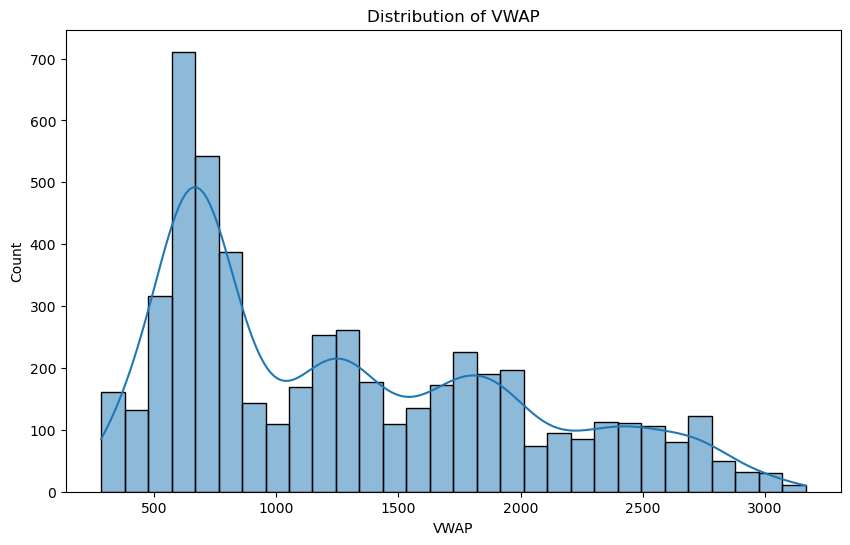

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(main_df['VWAP'], bins=30, kde=True)
plt.title('Distribution of VWAP')
plt.show()

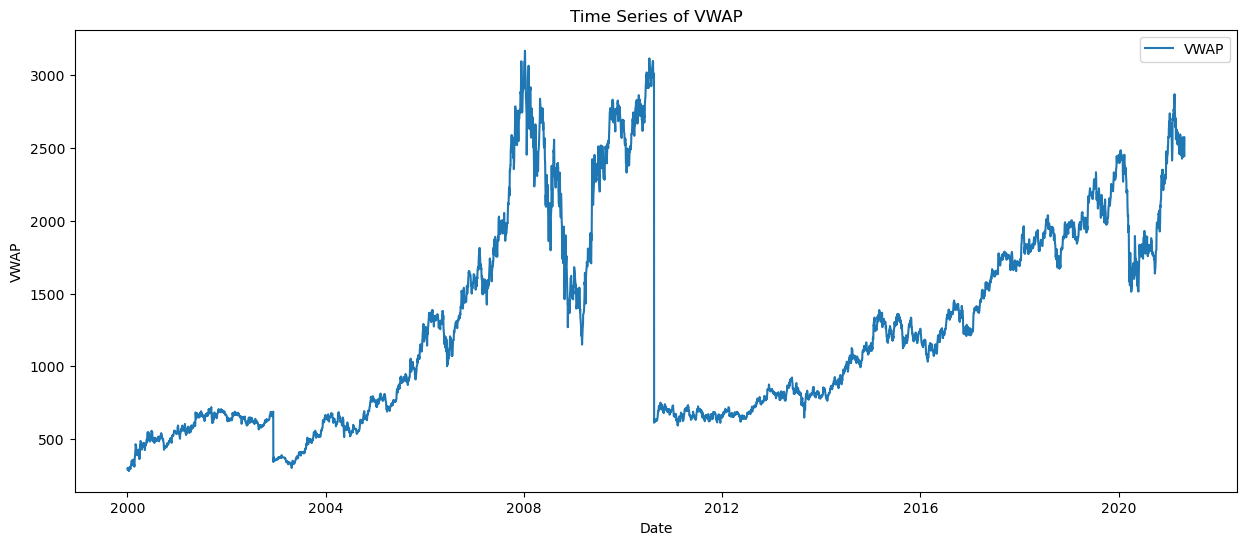

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(main_df['Date'], main_df['VWAP'], label='VWAP')
plt.title('Time Series of VWAP')
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.legend()
plt.show()

<Figure size 1500x800 with 0 Axes>

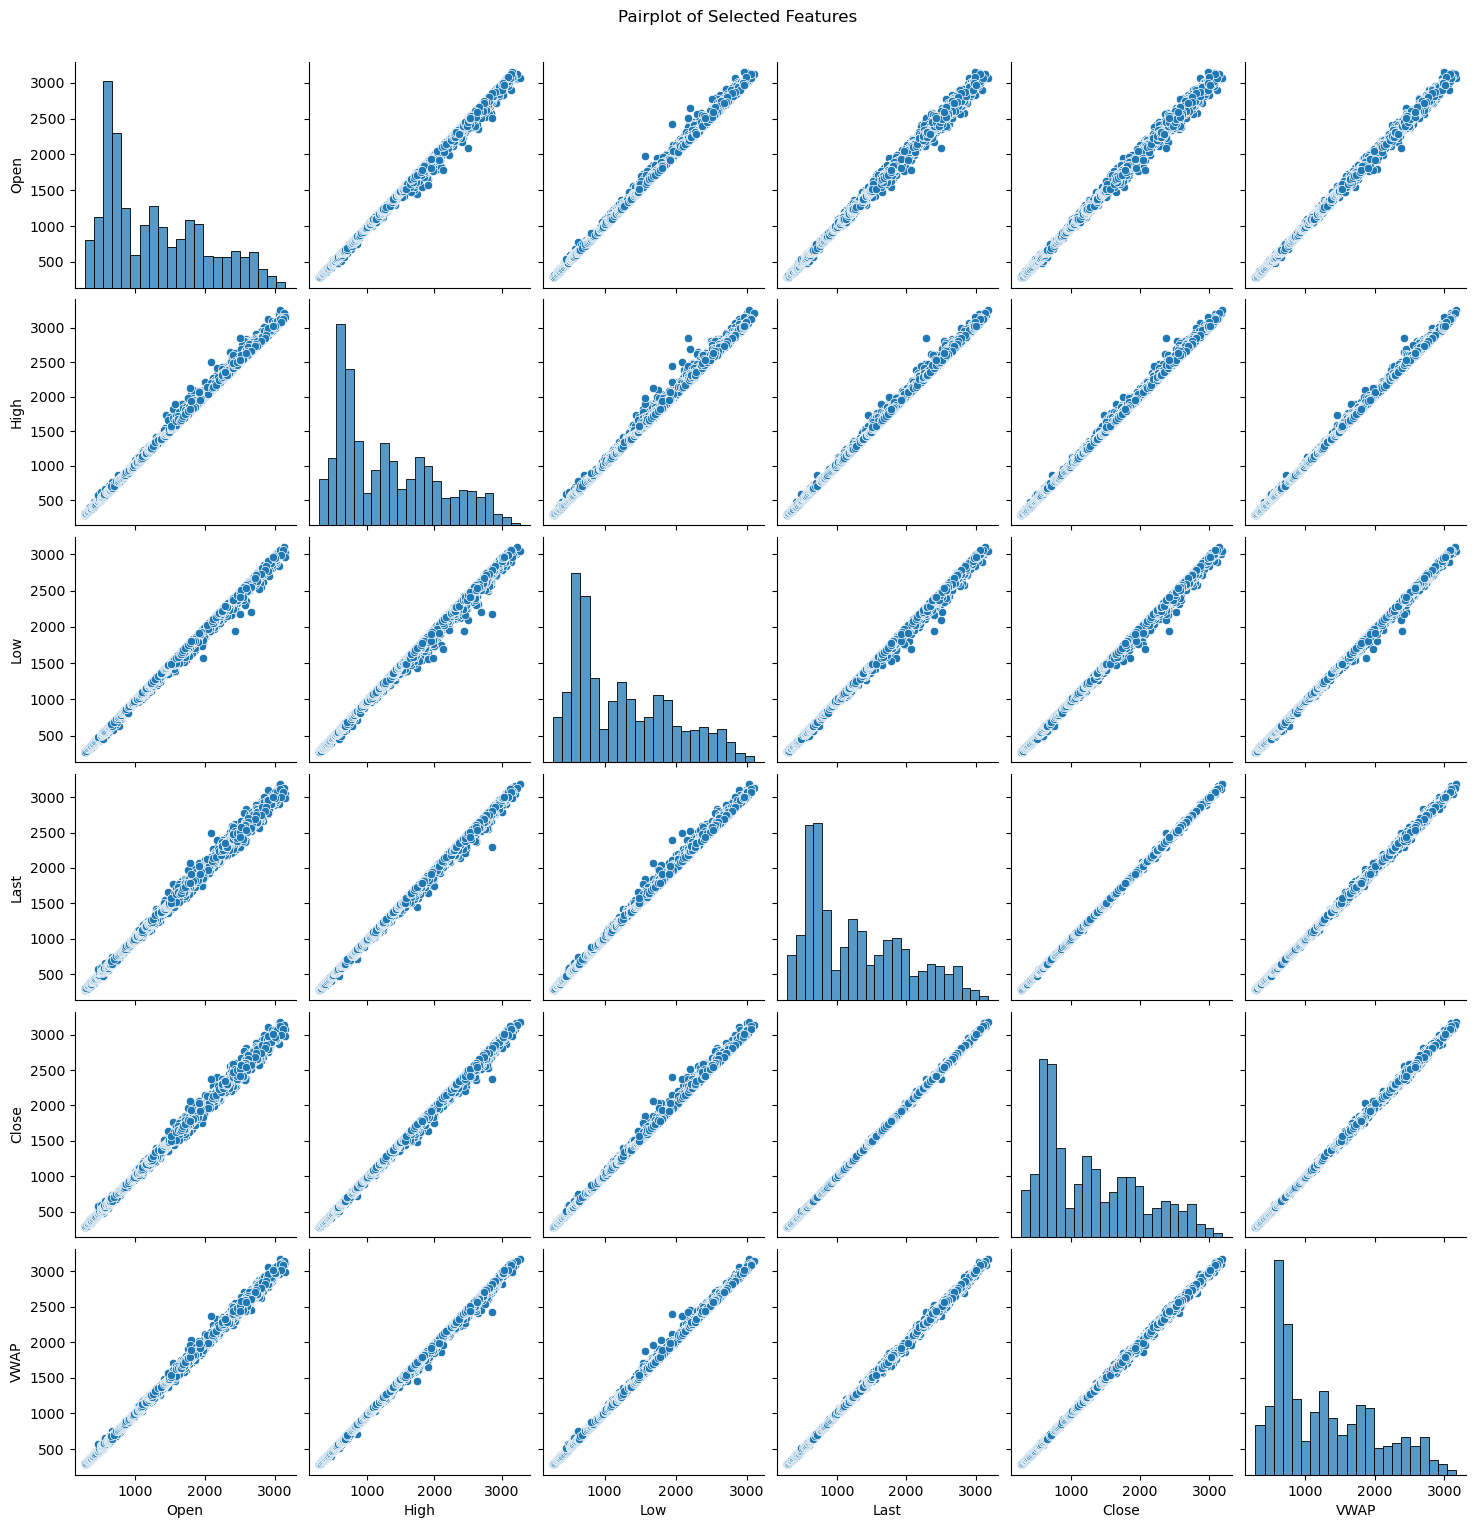

In [11]:
plt.figure(figsize=(15, 8))
sns.pairplot(main_df[['Open', 'High', 'Low', 'Last', 'Close', 'VWAP']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [12]:
class CFG:
    img_dim1 = 20
    img_dim2 = 10
    nepochs = 6
    seed = 42
    EPOCH = 300
    bsize = 16
    BATCH_SIZE = 1024

plt.rcParams.update({'figure.figsize': (CFG.img_dim1,CFG.img_dim2)})   


def seed_everything(seed: int = 42) -> None:
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
seed_everything(CFG.seed)

In [13]:
def my_rmse(x,y):
    return(np.round( np.sqrt(mse(x,y)) ,4))

In [14]:
def create_dataset(dataset, look_back, look_ahead):
    xdat, ydat = [], []
    for i in range(len(df) - look_back -look_ahead):
        xdat.append(df[i:i+ look_back ,0])
        ydat.append(df[i+ look_back : i + look_back + look_ahead,0])
    xdat, ydat = np.array(xdat), np.array(ydat).reshape(-1,look_ahead)
    return xdat, ydat

In [15]:
def prepare_split(xdat, ydat, cutoff = 5000, timesteps = 50):
    xtrain, xvalid = xdat[:cutoff,:], xdat[cutoff:,]
    ytrain, yvalid = ydat[:cutoff,:], ydat[cutoff:,]

    xtrain = xtrain.reshape(-1, timesteps, 1)
    xvalid = xvalid.reshape(-1, timesteps, 1)

    return xtrain, ytrain, xvalid, yvalid 

<Axes: >

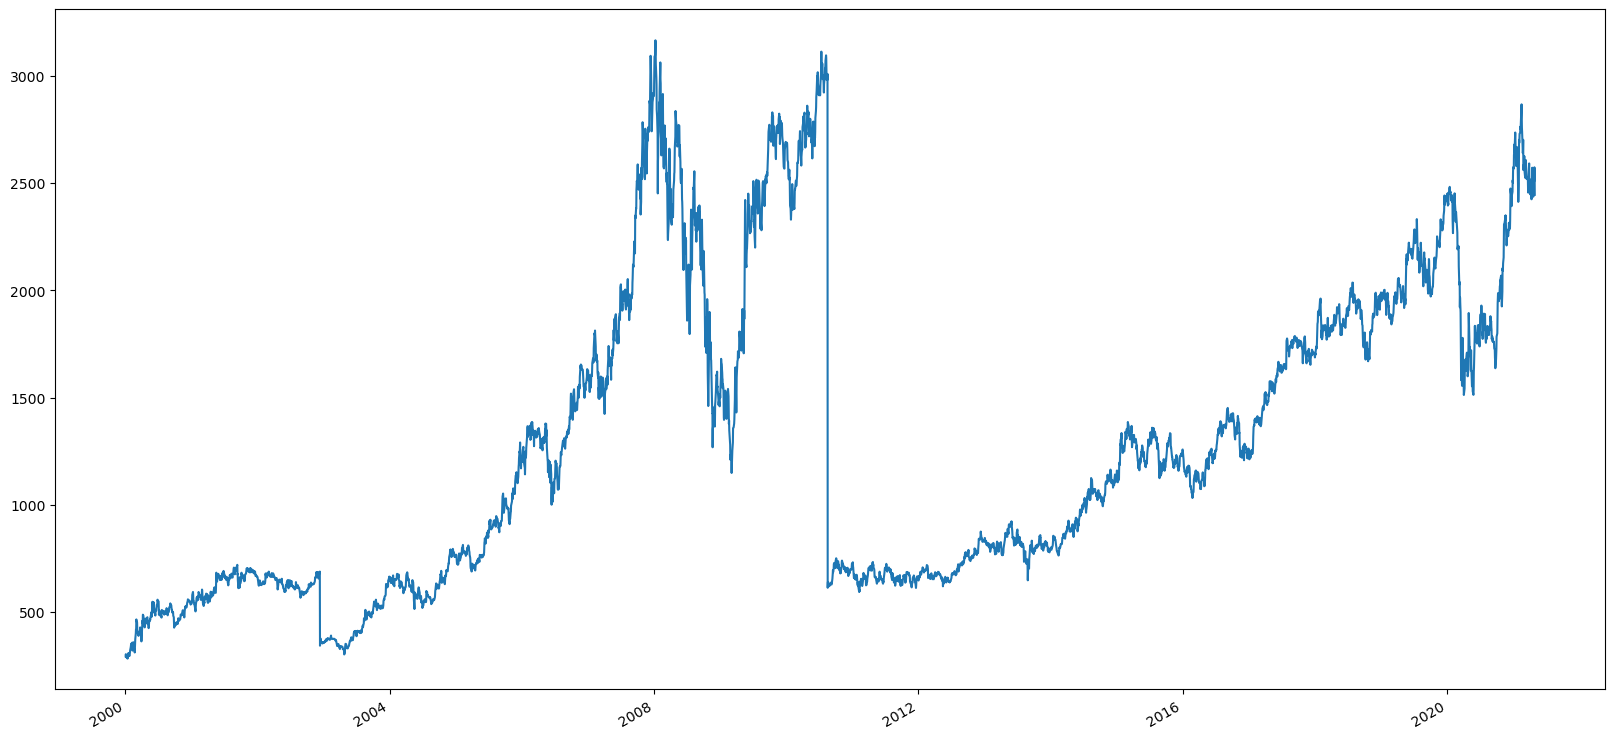

In [16]:
df = pd.read_csv(r"F:\Tejaswini\6th_Sem\DL\HDFC.csv", usecols = ['Date', 'VWAP'])
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date",  inplace=True)
df.VWAP.plot(xlabel = '')

In [17]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [18]:
look_back = 50
look_ahead = 1

xdat, ydat = create_dataset(main_df, look_back = look_back, look_ahead = look_ahead)

print(xdat.shape, ydat.shape)

(5255, 50) (5255, 1)


In [19]:
xtrain, ytrain, xvalid, yvalid = prepare_split(xdat, ydat, cutoff = 5000, timesteps = look_back)

print(xtrain.shape, xvalid.shape, ytrain.shape, yvalid.shape)

(5000, 50, 1) (255, 50, 1) (5000, 1) (255, 1)


In [27]:
def create_model4(out_dim):    
    
    model = Sequential()
    model.add(GRU(10,input_shape= [None,1], return_sequences = True))
    model.add(GRU(10,input_shape= [None,1]))
    model.add(Dense(out_dim))
    
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model
    
model_rnn = create_model4(out_dim = look_ahead)
model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, None, 10)          390       
                                                                 
 gru_3 (GRU)                 (None, 10)                660       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 1160 (4.53 KB)
Trainable params: 1160 (4.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
look_back = 50
look_ahead = 10

xdat, ydat = create_dataset(df, look_back = look_back, look_ahead = look_ahead)

xtrain, ytrain, xvalid, yvalid = prepare_split(xdat, ydat, cutoff = 5000, timesteps= look_back)

In [22]:
early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 5, mode = 'min', verbose = 1, restore_best_weights = True)

In [28]:
model_rnn.fit(xtrain, ytrain, validation_data=(xvalid, yvalid), epochs = CFG.nepochs, batch_size = CFG.bsize, callbacks=[ early_stop])

Epoch 1/6
313/313 [==============================] - 30s 74ms/step - loss: 0.0309 - val_loss: 0.0022
Epoch 2/6
313/313 [==============================] - 22s 69ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 3/6
313/313 [==============================] - 21s 69ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 4/6
313/313 [==============================] - 22s 69ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 5/6
313/313 [==============================] - 21s 68ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 6/6
313/313 [==============================] - 21s 67ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 6: early stopping


In [29]:
y_pred_rnn = model_rnn.predict(xvalid)
y_pred_rnn = scaler.inverse_transform(y_pred_rnn)

8/8 [==============================] - 2s 19ms/step


In [32]:
print('RMSE: ' + str(my_rmse(y_pred_rnn, scaler.inverse_transform(yvalid))))

RMSE: 133.8465


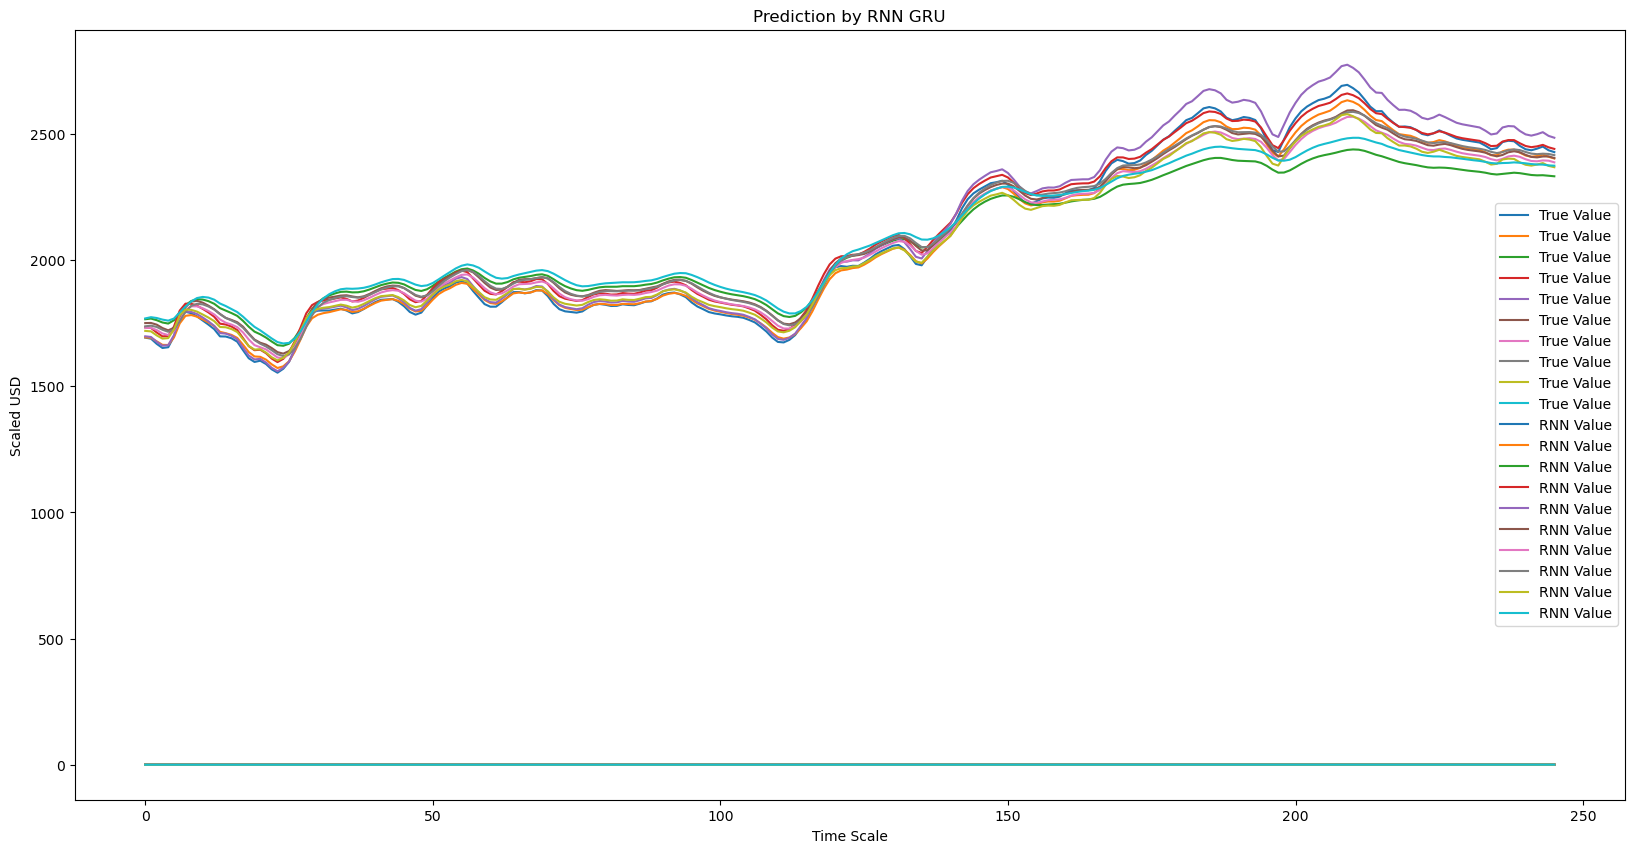

In [30]:
import matplotlib.pyplot as plt
plt.plot(yvalid, label='True Value')
plt.plot(y_pred_rnn, label='RNN Value')
plt.title('Prediction by RNN GRU')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()